In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the data
x_train, x_test = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0

In [3]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train)

In [4]:
# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Build the Improved CNN Model
model_improved = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile and train the model
model_improved.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
history_improved = model_improved.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=20, validation_data=(x_val, y_val), callbacks=[lr_scheduler])

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.2677 - loss: 1.9397 - val_accuracy: 0.5000 - val_loss: 1.3789 - learning_rate: 0.0010
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.4556 - loss: 1.4978 - val_accuracy: 0.5392 - val_loss: 1.2597 - learning_rate: 0.0010
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.5193 - loss: 1.3552 - val_accuracy: 0.5990 - val_loss: 1.1172 - learning_rate: 0.0010
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5550 - loss: 1.2586 - val_accuracy: 0.5946 - val_loss: 1.1129 - learning_rate: 0.0010
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.5750 - loss: 1.1910 - val_accuracy: 0.6522 - val_loss: 0.9714 - learning_rate: 0.0010
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.5962 - loss: 1.1511 - val_accuracy: 0.6618 - val_loss: 0.9586 - learning_rate: 0.0010
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.6170 - loss: 1.0905

In [6]:
# Evaluate the model
test_loss_improved, test_acc_improved = model_improved.evaluate(x_test, y_test)
print(f"Improved model test accuracy: {test_acc_improved}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7432 - loss: 0.7401
Improved model test accuracy: 0.7445999979972839


In [7]:
# Evaluate the ResNet Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False
model_resnet = Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])
model_resnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_resnet = model_resnet.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=10, validation_data=(x_val, y_val))

# Evaluate the ResNet model
test_loss_resnet, test_acc_resnet = model_resnet.evaluate(x_test, y_test)
print(f"ResNet model test accuracy: {test_acc_resnet}")

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 44s 60ms/step - accuracy: 0.1154 - loss: 2.3657 - val_accuracy: 0.2028 - val_loss: 2.2086
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.1363 - loss: 2.2477 - val_accuracy: 0.2042 - val_loss: 2.1803
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 44s 62ms/step - accuracy: 0.1360 - loss: 2.2399 - val_accuracy: 0.1886 - val_loss: 2.1879
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.1319 - loss: 2.2292 - val_accuracy: 0.1984 - val_loss: 2.1850
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 44s 63ms/step - accuracy: 0.1379 - loss: 2.2245 - val_accuracy: 0.1580 - val_loss: 2.2211
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 44s 63ms/step - accuracy: 0.1331 - loss: 2.2271 - val_accuracy: 0.1692 - val_loss: 2.1623
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 44s 63ms/step - accuracy: 0.1347 - loss: 2.2218 - val_accuracy: 0.1916 - val_loss: 2.1438
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 257s 366ms/step - accuracy: 0.1323 - loss: 2.2211 

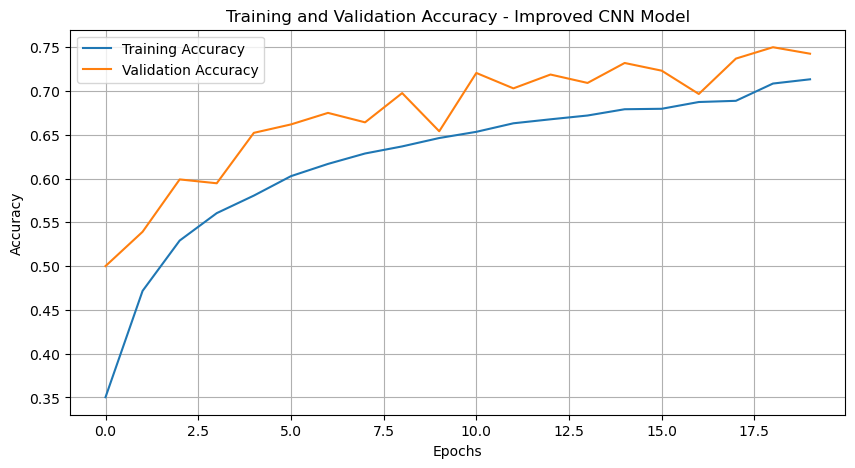

In [8]:
# Plot training and validation accuracy for the improved CNN model
plt.figure(figsize=(10, 5))
plt.plot(history_improved.history['accuracy'], label='Training Accuracy')
plt.plot(history_improved.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy - Improved CNN Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

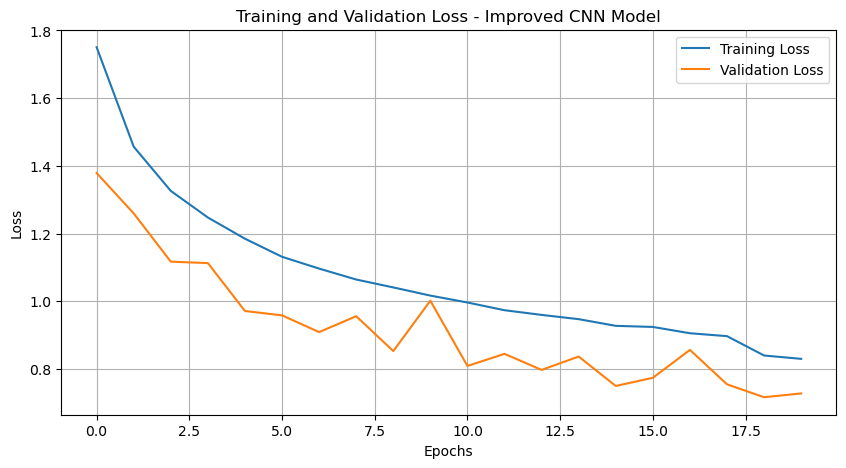

In [17]:
# Plot training and validation loss for the improved CNN model
plt.figure(figsize=(10, 5))
plt.plot(history_improved.history['loss'], label='Training Loss')
plt.plot(history_improved.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss - Improved CNN Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Predict on the test set for the improved CNN model
y_pred_improved = model_improved.predict(x_test)
y_pred_classes_improved = np.argmax(y_pred_improved, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


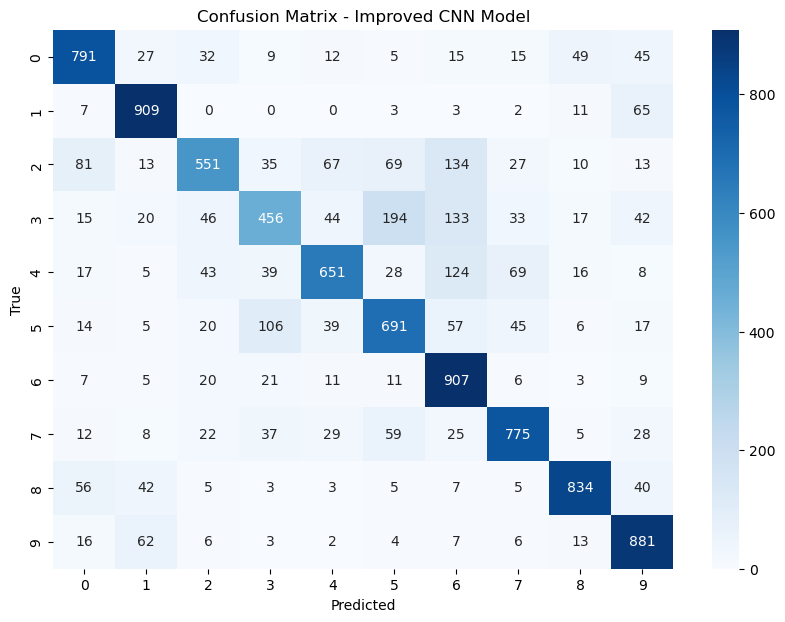

In [21]:
# Confusion Matrix for the Improved CNN model
conf_matrix_improved = confusion_matrix(y_test, y_pred_classes_improved)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_improved, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - Improved CNN Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

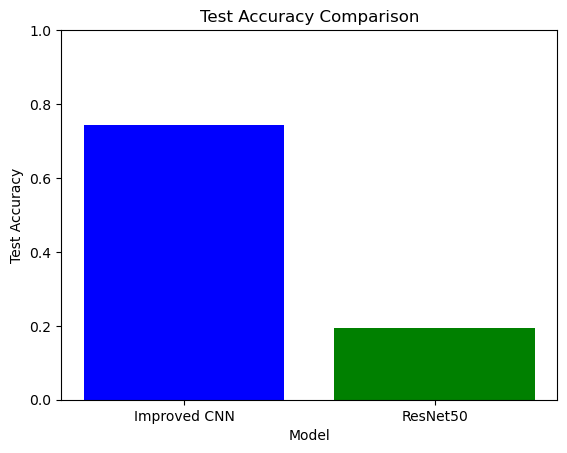

In [23]:
# Plotting a bar chart to compare the accuracy of different models
models = ['Improved CNN', 'ResNet50']
accuracies = [test_acc_improved, test_acc_resnet]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Test Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.ylim([0, 1])
plt.show()

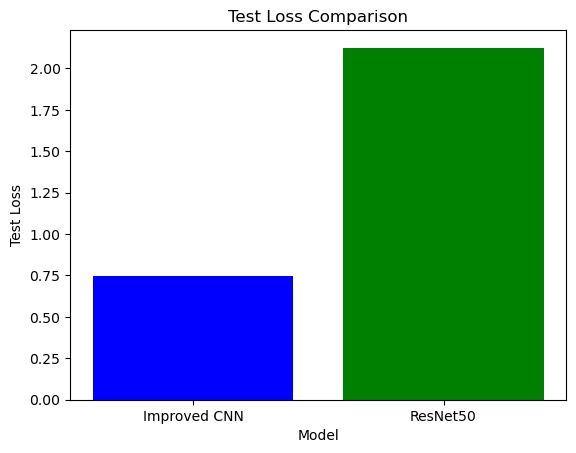

In [25]:
# Plotting a bar chart to compare the loss of different models
losses = [test_loss_improved, test_loss_resnet]

plt.bar(models, losses, color=['blue', 'green'])
plt.title('Test Loss Comparison')
plt.xlabel('Model')
plt.ylabel('Test Loss')
plt.show()